<a href="https://colab.research.google.com/github/SahilPatki30082002/Stock-Market-Analysis-using-pandas/blob/main/Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

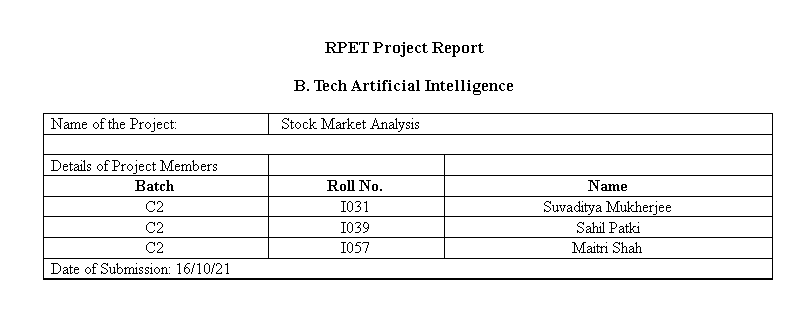

##**Import calls**

In [ ]:
!pip install yfinance
import pandas_datareader.data as web
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
%matplotlib inline
import warnings
import yfinance as yf
yf.pdr_override()
warnings.filterwarnings('ignore')

     |████████████████████████████████| 6.3 MB 11.6 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=e39953896c07334a2b6a59d45e90d9e8f3ed5b1e251e2ce57bf64667be322cfd
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


##**Initial Data and Analysis**

In [ ]:
start  = datetime.datetime(2003, 12, 1)   #start date
end = datetime.datetime(2021, 1, 1)       #end date

In [ ]:
#Do make sure you use the ^ symbol while mentioning the ticker names

FTSE = web.get_data_yahoo("^FTSE", start, end)  #FTSE dataset - The Financial Times Stock Exchange is index of the companies listed on the London Stock Exchange
BSE = web.get_data_yahoo("^BSESN", start, end)  #BSE dataset - The BSE SENSEX is a market-weighted stock listed on the Bombay Stock Exchange
DJI = web.get_data_yahoo("^DJI", start, end)    #DJI dataset - The Dow Jones Industrial Average is index of companies listed on stock exchanges in the US
gbp = web.get_data_yahoo("USDGBP=X", start, end)  #for converting GBP to USD
inr = web.get_data_yahoo("USDINR=X", start, end)  #for converting INR to USD 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
gbp.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,0.58011,0.58194,0.57897,0.58187,0.58187,0
2003-12-02,0.58173,0.58231,0.57733,0.57793,0.57793,0
2003-12-03,0.57787,0.57964,0.57743,0.57867,0.57867,0
2003-12-04,0.57890,0.58197,0.57837,0.58116,0.58116,0
2003-12-05,0.58119,0.58146,0.57700,0.57700,0.57700,0


In [ ]:
inr.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,45.709000,45.728001,45.615002,45.709999,45.709999,0
2003-12-02,45.709000,45.719002,45.560001,45.629002,45.629002,0
2003-12-03,45.632000,45.655998,45.474998,45.549999,45.549999,0
2003-12-04,45.548000,45.612999,45.519001,45.548000,45.548000,0
2003-12-05,45.549999,45.566002,45.449001,45.449001,45.449001,0


In [ ]:
FTSE.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,4342.600098,4410.000000,4342.600098,4410.000000,4410.000000,1574257800
2003-12-02,4410.000000,4416.500000,4359.899902,4378.899902,4378.899902,1956833600
2003-12-03,4378.899902,4401.600098,4373.000000,4392.000000,4392.000000,2145700500
2003-12-04,4392.000000,4392.000000,4371.500000,4378.200195,4378.200195,1748247800
2003-12-05,4378.200195,4385.399902,4337.700195,4367.000000,4367.000000,1518092200


In [ ]:
DJI.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,9785.349609,9902.230469,9785.349609,9899.049805,9899.049805,227650000
2003-12-02,9899.639648,9900.450195,9837.269531,9853.639648,9853.639648,257640000
2003-12-03,9851.940430,9942.009766,9851.419922,9873.419922,9873.419922,222570000
2003-12-04,9874.830078,9933.860352,9865.780273,9930.820312,9930.820312,267840000
2003-12-05,9923.269531,9923.419922,9846.309570,9862.679688,9862.679688,201640000


In [ ]:
BSE.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,5086.859863,5166.560059,5082.819824,5160.850098,5160.850098,51200
2003-12-02,5187.729980,5204.569824,5123.799805,5186.080078,5186.080078,33400
2003-12-03,5194.160156,5246.740234,5178.220215,5221.899902,5221.899902,25400
2003-12-04,5229.180176,5252.209961,5174.859863,5225.899902,5225.899902,32200
2003-12-05,5245.750000,5263.109863,5125.069824,5131.720215,5131.720215,31400


In [ ]:
FTSE['Open'] = FTSE['Open']/gbp['Open']   #Converting GBP to USD
FTSE['High'] = FTSE['High']/gbp['High']
FTSE['Low'] = FTSE['Low']/gbp['Low']
FTSE['Close'] = FTSE['Close']/gbp['Close']

BSE['Open'] = BSE['Open']/inr['Open']     #Converting INR to USD
BSE['High'] = BSE['High']/inr['High']
BSE['Low'] = BSE['Low']/inr['Low']
BSE['Close'] = BSE['Close']/inr['Close']

In [ ]:
FTSE.head()  #After conversion of GBP to USD

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,7485.821649,7578.100896,7500.561315,7579.012241,4410.000000,1574257800
2003-12-02,7580.836365,7584.447874,7551.833359,7576.869348,4378.899902,1956833600
2003-12-03,7577.655557,7593.679380,7573.212208,7589.817705,4392.000000,2145700500
2003-12-04,7586.802824,7546.781068,7558.310750,7533.553803,4378.200195,1748247800
2003-12-05,7533.165179,7542.049168,7517.677696,7568.457251,4367.000000,1518092200


In [ ]:
BSE.head()  #After conversion of INR to USD

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,111.287928,112.984604,111.428689,112.904183,5160.850098,51200
2003-12-02,113.494717,113.838221,112.462679,113.657540,5186.080078,33400
2003-12-03,113.827142,114.918969,113.869607,114.641054,5221.899902,25400
2003-12-04,114.805922,115.147219,113.685708,114.733904,5225.899902,32200
2003-12-05,115.164656,115.505193,112.765290,112.911617,5131.720215,31400


Text(0, 0.5, 'Stock Prices')

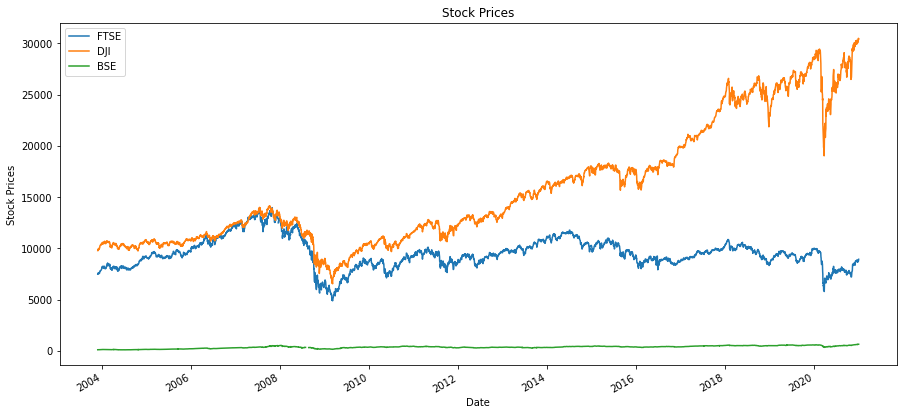

In [ ]:
# Plot for Opening of Stock prices from 2003 to 2021

FTSE['Open'].plot(label = 'FTSE', figsize = (15,7))
DJI['Open'].plot(label = 'DJI')
BSE['Open'].plot(label = 'BSE')
plt.legend()
plt.title('Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Prices')

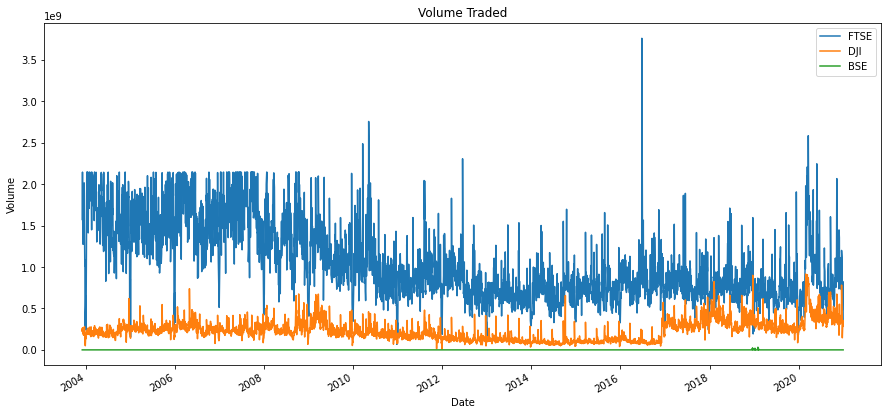

In [ ]:
# Plot for Volume of Stock prices from 2003 to 2021

FTSE['Volume'].plot(label = 'FTSE', figsize = (15,7))
DJI['Volume'].plot(label = 'DJI', figsize = (15,7))
BSE['Volume'].plot(label = 'BSE', figsize = (15,7))
plt.legend()
plt.title('Volume Traded')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

In [ ]:
FTSE.iloc[[FTSE['Volume'].argmax()]]   #Maximum Value of Volume for FTSE

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-24,9228.316338,8391.828576,8468.335304,8936.688112,6138.700195,3761301300


In [ ]:
DJI.iloc[[DJI['Volume'].argmax()]]   #Maximum Value of Volume for DJI

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-28,25270.830078,25494.240234,24681.009766,25409.359375,25409.359375,915990000


In [ ]:
BSE.iloc[[BSE['Volume'].argmax()]]   #Maximum Value of Volume for BSE

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-02-01,511.793373,514.523488,510.73493,512.211113,36469.429688,31815100


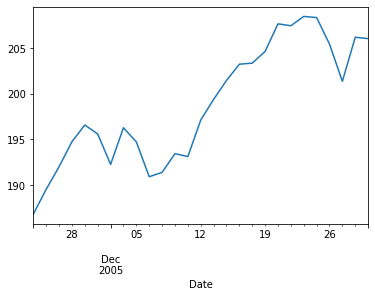

In [ ]:
BSE.iloc[493:520]['Open'].plot()        #Plotting values all between 493 and 520
plt.show()

In [ ]:
FTSE['Total Traded'] = FTSE['Open'] * FTSE['Volume']    #Finding total trade for a particular date
DJI['Total Traded'] = DJI['Open'] * DJI['Volume']
BSE['Total Traded'] = BSE['Open'] * BSE['Volume']

In [ ]:
FTSE.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded
Date,,,,,,,
2003-12-01,7485.821649,7578.100896,7500.561315,7579.012241,4410.000000,1574257800,1.178461e+13
2003-12-02,7580.836365,7584.447874,7551.833359,7576.869348,4378.899902,1956833600,1.483444e+13
2003-12-03,7577.655557,7593.679380,7573.212208,7589.817705,4392.000000,2145700500,1.625938e+13
2003-12-04,7586.802824,7546.781068,7558.310750,7533.553803,4378.200195,1748247800,1.326361e+13
2003-12-05,7533.165179,7542.049168,7517.677696,7568.457251,4367.000000,1518092200,1.143604e+13


In [ ]:
DJI.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded
Date,,,,,,,
2003-12-01,9785.349609,9902.230469,9785.349609,9899.049805,9899.049805,227650000,2.227635e+12
2003-12-02,9899.639648,9900.450195,9837.269531,9853.639648,9853.639648,257640000,2.550543e+12
2003-12-03,9851.940430,9942.009766,9851.419922,9873.419922,9873.419922,222570000,2.192746e+12
2003-12-04,9874.830078,9933.860352,9865.780273,9930.820312,9930.820312,267840000,2.644874e+12
2003-12-05,9923.269531,9923.419922,9846.309570,9862.679688,9862.679688,201640000,2.000928e+12


In [ ]:
BSE.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded
Date,,,,,,,
2003-12-01,111.287928,112.984604,111.428689,112.904183,5160.850098,51200,5.697942e+06
2003-12-02,113.494717,113.838221,112.462679,113.657540,5186.080078,33400,3.790724e+06
2003-12-03,113.827142,114.918969,113.869607,114.641054,5221.899902,25400,2.891209e+06
2003-12-04,114.805922,115.147219,113.685708,114.733904,5225.899902,32200,3.696751e+06
2003-12-05,115.164656,115.505193,112.765290,112.911617,5131.720215,31400,3.616170e+06


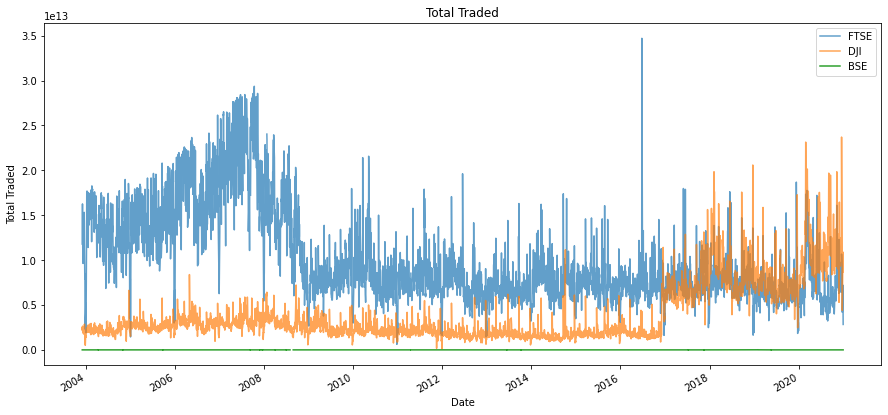

In [ ]:
FTSE['Total Traded'].plot(label = 'FTSE', figsize = (15,7), alpha=0.7)
DJI['Total Traded'].plot(label = 'DJI', alpha=0.7)
BSE['Total Traded'].plot(label = 'BSE')
plt.legend()
plt.title('Total Traded')
plt.xlabel('Date')
plt.ylabel('Total Traded')
plt.show()

In [ ]:
FTSE['Total Traded'].argmax()  #index for the maximum total traded

3159

In [ ]:
FTSE.iloc[[FTSE['Total Traded'].argmax()]]    #Maximum Total trade values

,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2016-06-24,9228.316338,8391.828576,8468.335304,8936.688112,6138.700195,3761301300,3.471048e+13,8976.069745,9045.929169,-0.046618,1.274507


##**Technical Analysis - Moving Average**

In [ ]:
#Moving average will help us make the data more robust with respect to time.
#The Data Currently changes rapidly on daily basis as these are stock prices.
#For example MA50 represents we will smooth over 50 samples at a time. 
# In this will after plotting the graph, we can observe the trend that a particular stock follows.

###**DJI**

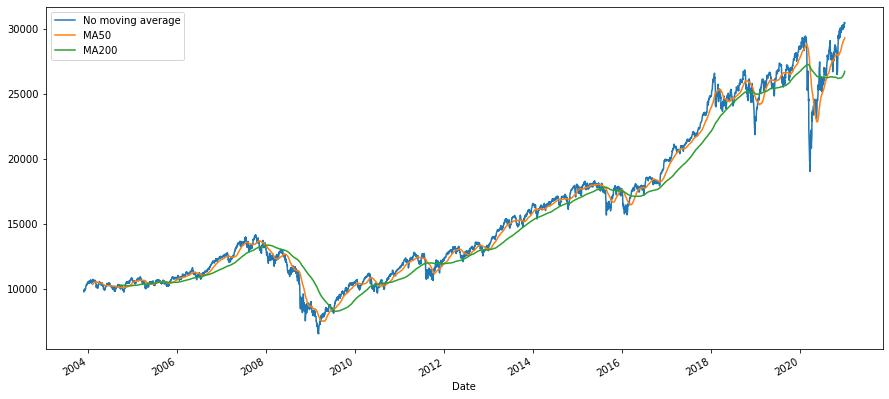

In [ ]:
DJI['Open'].plot(label = 'No moving average', figsize = (15,7))
DJI['MA50'] = DJI['Open'].rolling(50).mean()
DJI['MA50'].plot(label = 'MA50')
DJI['MA200'] = DJI['Open'].rolling(200).mean()
DJI['MA200'].plot(label = 'MA200')
plt.legend()
plt.show()

###**FTSE**

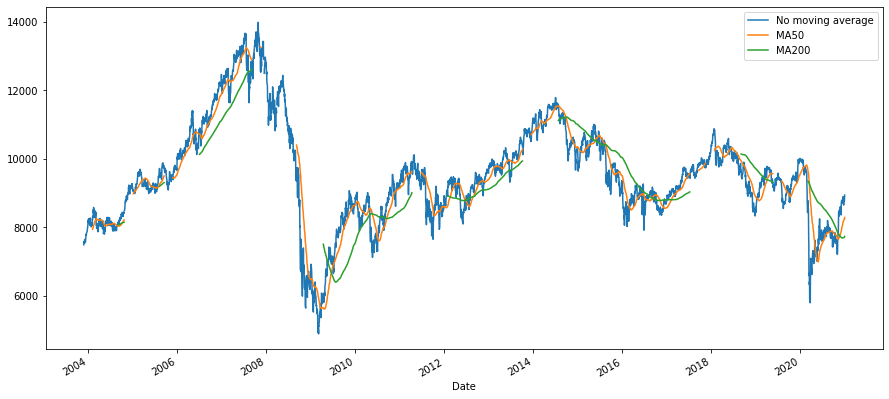

In [ ]:
FTSE['Open'].plot(label = 'No moving average', figsize = (15,7))
FTSE['MA50'] = FTSE['Open'].rolling(50).mean()
FTSE['MA50'].plot(label = 'MA50')
FTSE['MA200'] = FTSE['Open'].rolling(200).mean()
FTSE['MA200'].plot(label = 'MA200')
plt.legend()
plt.show()

###**BSE SENSEX**

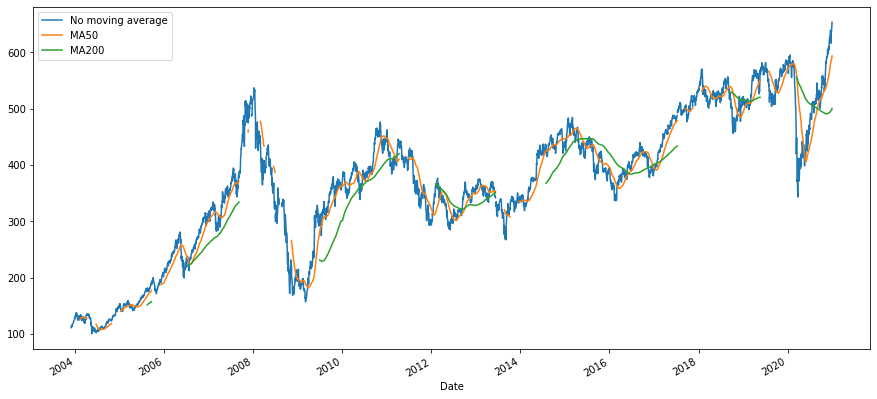

In [ ]:
BSE['Open'].plot(label = 'No moving average', figsize = (15,7))
BSE['MA50'] = BSE['Open'].rolling(50).mean()
BSE['MA50'].plot(label = 'MA50')
BSE['MA200'] = BSE['Open'].rolling(200).mean()
BSE['MA200'].plot(label = 'MA200')
plt.legend()
plt.show()



##  **Correlation**



In [ ]:
car_comp = pd.concat([FTSE['Open'], DJI['Open'], BSE['Open']], axis=1)
car_comp.columns = ['FTSE open', 'DJI open', 'BSE open']

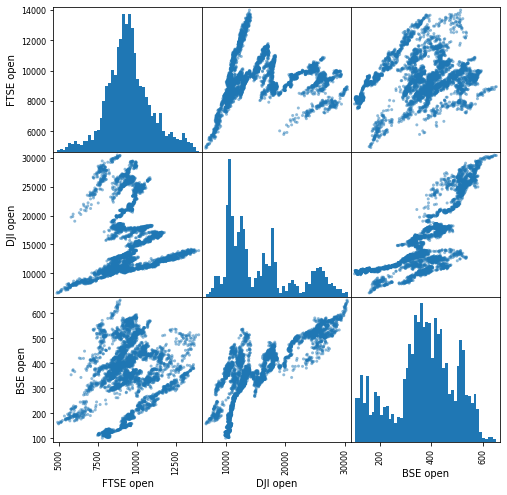

In [ ]:
scatter_matrix(car_comp, figsize = (8,8), hist_kwds = {'bins': 50})
plt.show()

##**Graphs to check the effect of Covid-19**

In [ ]:
!pip install mpl_finance
from mpl_finance import candlestick_ohlc

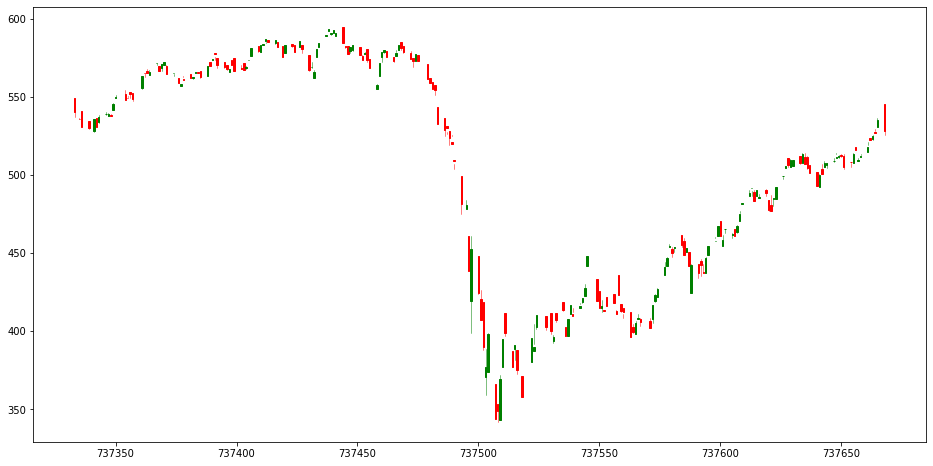

In [ ]:
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

BSE_reset = BSE.loc['2019-10': '2020-08'].reset_index()

BSE_reset['date_ax'] = BSE_reset['Date']. apply(lambda date: date2num(date))
BSE_values = [tuple(vals) for vals in BSE_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

fig, ax = plt.subplots(figsize = (16,8))
candlestick_ohlc(ax, BSE_values, width = 0.6, colorup = 'g', colordown = 'r')
plt.show()

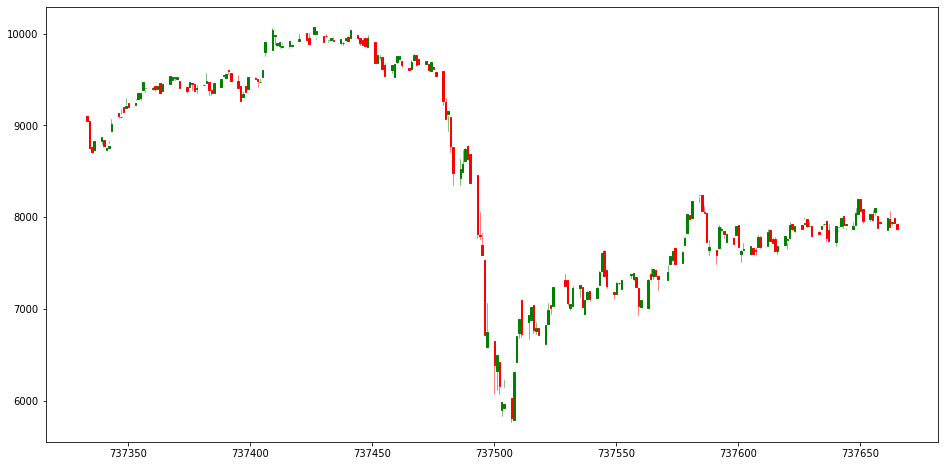

In [ ]:
FTSE_reset = FTSE.loc['2019-10': '2020-08'].reset_index()

FTSE_reset['date_ax'] = FTSE_reset['Date']. apply(lambda date: date2num(date))
FTSE_values = [tuple(vals) for vals in FTSE_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

fig, ax = plt.subplots(figsize = (16,8))
candlestick_ohlc(ax, FTSE_values, width = 0.6, colorup = 'g', colordown = 'r')
plt.show()

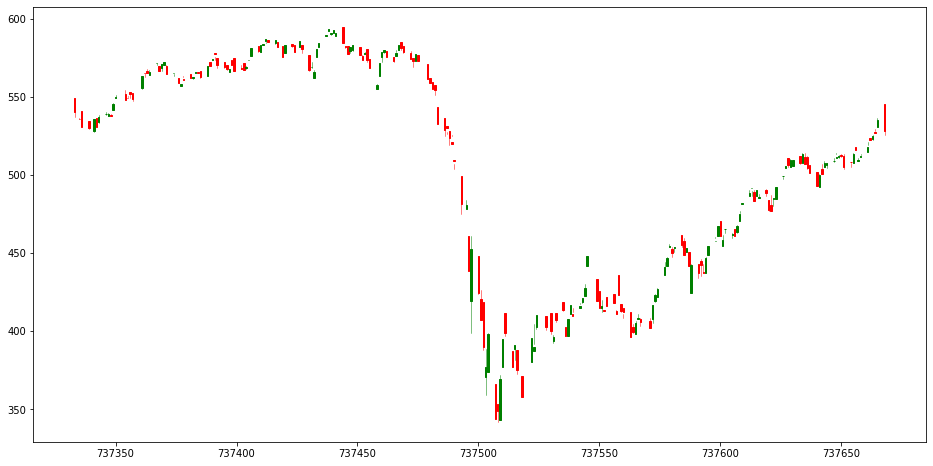

In [ ]:
BSE_reset = BSE.loc['2019-10': '2020-08'].reset_index()

BSE_reset['date_ax'] = BSE_reset['Date']. apply(lambda date: date2num(date))
BSE_values = [tuple(vals) for vals in BSE_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter('%b %d')
dayFormatter = DateFormatter('%d')

fig, ax = plt.subplots(figsize = (16,8))
candlestick_ohlc(ax, BSE_values, width = 0.6, colorup = 'g', colordown = 'r')
plt.show()

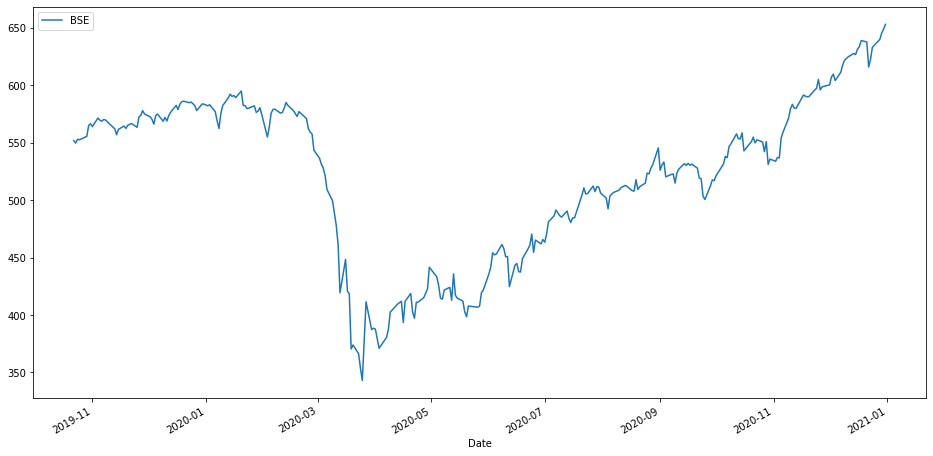

In [ ]:
BSE.iloc[3900:4500]['Open'].plot(figsize = (16,8),label = 'BSE')        #Plotting values between 493 and 520
plt.legend()
plt.show()

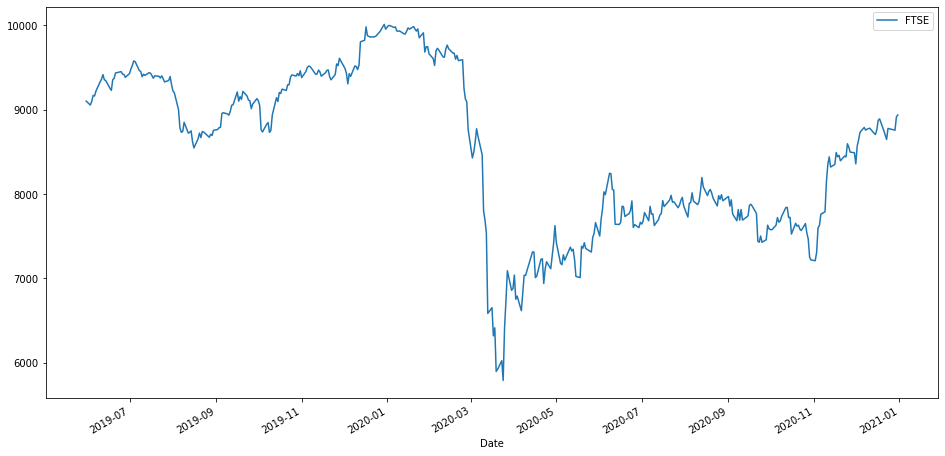

In [ ]:
FTSE.iloc[3900:4500]['Open'].plot(figsize = (16,8),label = 'FTSE')        #Plotting values between 493 and 520
plt.legend()
plt.show()

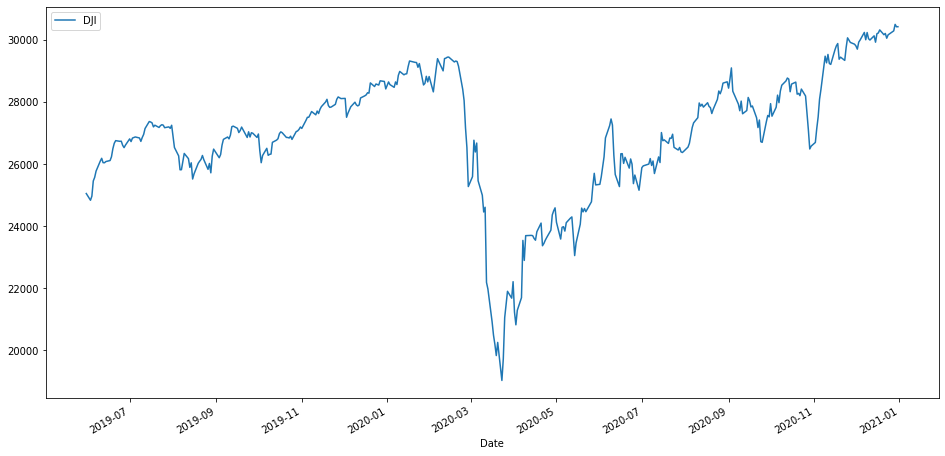

In [ ]:
DJI.iloc[3900:4500]['Open'].plot(figsize = (16,8),label = 'DJI')        #Plotting values between 493 and 520
plt.legend()
plt.show()

##**Daily Percentage Change**


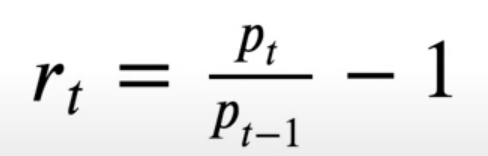

In [ ]:
FTSE['returns'] = (FTSE['Close']/FTSE['Close'].shift(1))-1
BSE['returns'] = (BSE['Close']/BSE['Close'].shift(1))-1
DJI['returns'] = (DJI['Close']/DJI['Close'].shift(1))-1

In [ ]:
FTSE.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2003-12-01,7485.821649,7578.100896,7500.561315,7579.012241,4410.000000,1574257800,1.178461e+13,NaN,NaN,NaN
2003-12-02,7580.836365,7584.447874,7551.833359,7576.869348,4378.899902,1956833600,1.483444e+13,NaN,NaN,-0.000283
2003-12-03,7577.655557,7593.679380,7573.212208,7589.817705,4392.000000,2145700500,1.625938e+13,NaN,NaN,0.001709
2003-12-04,7586.802824,7546.781068,7558.310750,7533.553803,4378.200195,1748247800,1.326361e+13,NaN,NaN,-0.007413
2003-12-05,7533.165179,7542.049168,7517.677696,7568.457251,4367.000000,1518092200,1.143604e+13,NaN,NaN,0.004633


In [ ]:
BSE.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2003-12-01,111.287928,112.984604,111.428689,112.904183,5160.850098,51200,5.697942e+06,NaN,NaN,NaN
2003-12-02,113.494717,113.838221,112.462679,113.657540,5186.080078,33400,3.790724e+06,NaN,NaN,0.006673
2003-12-03,113.827142,114.918969,113.869607,114.641054,5221.899902,25400,2.891209e+06,NaN,NaN,0.008653
2003-12-04,114.805922,115.147219,113.685708,114.733904,5225.899902,32200,3.696751e+06,NaN,NaN,0.000810
2003-12-05,115.164656,115.505193,112.765290,112.911617,5131.720215,31400,3.616170e+06,NaN,NaN,-0.015883


In [ ]:
DJI.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2003-12-01,9785.349609,9902.230469,9785.349609,9899.049805,9899.049805,227650000,2.227635e+12,NaN,NaN,NaN
2003-12-02,9899.639648,9900.450195,9837.269531,9853.639648,9853.639648,257640000,2.550543e+12,NaN,NaN,-0.004587
2003-12-03,9851.940430,9942.009766,9851.419922,9873.419922,9873.419922,222570000,2.192746e+12,NaN,NaN,0.002007
2003-12-04,9874.830078,9933.860352,9865.780273,9930.820312,9930.820312,267840000,2.644874e+12,NaN,NaN,0.005814
2003-12-05,9923.269531,9923.419922,9846.309570,9862.679688,9862.679688,201640000,2.000928e+12,NaN,NaN,-0.006862


##**Volatility**

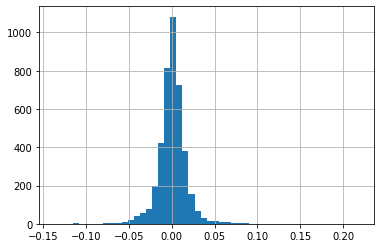

In [ ]:
BSE['returns'].hist(bins = 50)
plt.show()

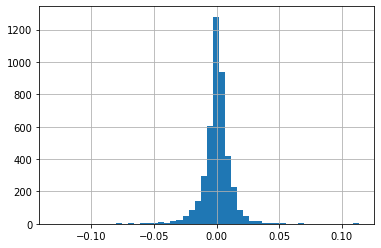

In [ ]:
DJI['returns'].hist(bins = 50)
plt.show()

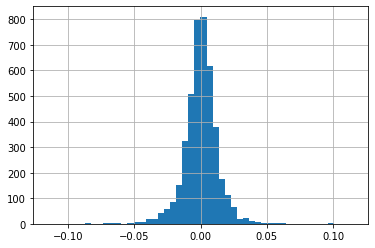

In [ ]:
FTSE['returns'].hist(bins = 50)
plt.show()

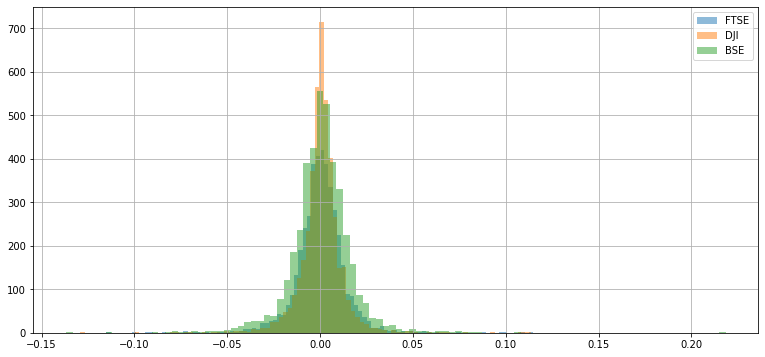

In [ ]:
#Here we will plot the Volatility of all the three graphs together

FTSE['returns'].hist(bins = 100, label = 'FTSE', alpha=0.5, figsize = (13,6))   #alpha for transparency
DJI['returns'].hist(bins = 100, label = 'DJI', alpha=0.5)
BSE['returns'].hist(bins = 100, label = 'BSE', alpha=0.5)
plt.legend()
plt.show()
#This plot is not normalized. We normalize it below using kde graphs

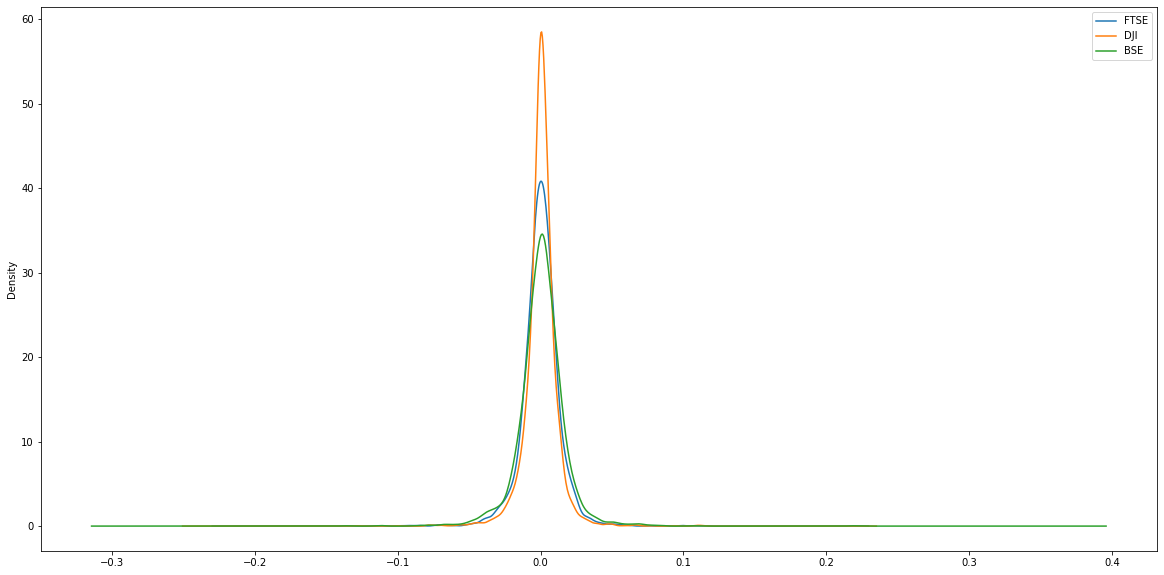

In [ ]:
#The plot below is normalized. We can now thus comment and compare the volatility of each stock.
#From the graph we thus see that BSE is most volatile then FTSE and lastly the least volatile is DJI
FTSE['returns'].plot(kind = 'kde', label = 'FTSE', figsize = (20,10))
DJI['returns'].plot(kind = 'kde', label = 'DJI')
BSE['returns'].plot(kind = 'kde', label = 'BSE')
plt.legend()
plt.show()

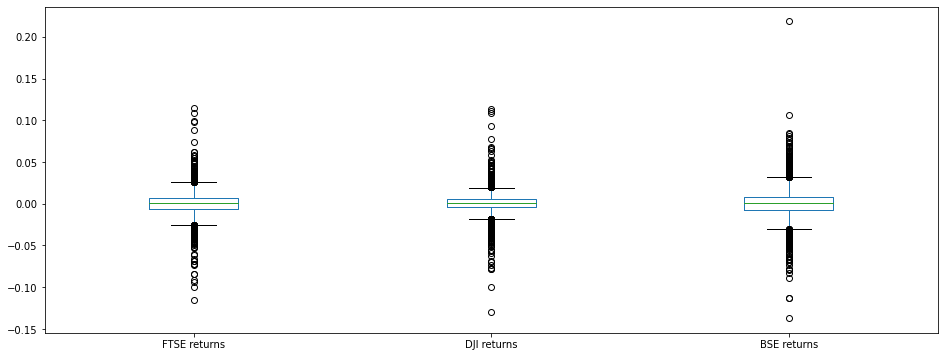

In [ ]:
#We again get the same result using the box graph that BSE is most volatile then FTSE and lastly the least volatile is DJI
box_df = pd.concat([FTSE['returns'], DJI['returns'], BSE['returns']],axis = 1)
box_df.columns = ['FTSE returns', 'DJI returns', 'BSE returns']
box_df.plot(kind = 'box', figsize = (16,6))
plt.show()

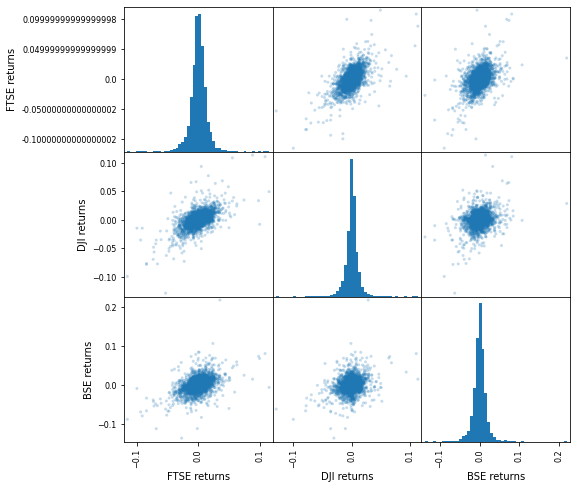

In [ ]:
scatter_matrix(box_df, figsize = (8,8), hist_kwds= {'bins': 50}, alpha = 0.25)
plt.show()

##**Cumulative Return**

In [ ]:
#We now add the cumulative returns column to perform its analysis
FTSE['Cumulative Return'] = (1 + FTSE['returns']).cumprod()
DJI['Cumulative Return'] = (1 + DJI['returns']).cumprod()
BSE['Cumulative Return'] = (1 + BSE['returns']).cumprod()

In [ ]:
FTSE.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2003-12-01,7485.821649,7578.100896,7500.561315,7579.012241,4410.000000,1574257800,1.178461e+13,NaN,NaN,NaN,NaN
2003-12-02,7580.836365,7584.447874,7551.833359,7576.869348,4378.899902,1956833600,1.483444e+13,NaN,NaN,-0.000283,0.999717
2003-12-03,7577.655557,7593.679380,7573.212208,7589.817705,4392.000000,2145700500,1.625938e+13,NaN,NaN,0.001709,1.001426
2003-12-04,7586.802824,7546.781068,7558.310750,7533.553803,4378.200195,1748247800,1.326361e+13,NaN,NaN,-0.007413,0.994002
2003-12-05,7533.165179,7542.049168,7517.677696,7568.457251,4367.000000,1518092200,1.143604e+13,NaN,NaN,0.004633,0.998607


In [ ]:
DJI.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2003-12-01,9785.349609,9902.230469,9785.349609,9899.049805,9899.049805,227650000,2.227635e+12,NaN,NaN,NaN,NaN
2003-12-02,9899.639648,9900.450195,9837.269531,9853.639648,9853.639648,257640000,2.550543e+12,NaN,NaN,-0.004587,0.995413
2003-12-03,9851.940430,9942.009766,9851.419922,9873.419922,9873.419922,222570000,2.192746e+12,NaN,NaN,0.002007,0.997411
2003-12-04,9874.830078,9933.860352,9865.780273,9930.820312,9930.820312,267840000,2.644874e+12,NaN,NaN,0.005814,1.003209
2003-12-05,9923.269531,9923.419922,9846.309570,9862.679688,9862.679688,201640000,2.000928e+12,NaN,NaN,-0.006862,0.996326


In [ ]:
BSE.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2003-12-01,111.287928,112.984604,111.428689,112.904183,5160.850098,51200,5.697942e+06,NaN,NaN,NaN,NaN
2003-12-02,113.494717,113.838221,112.462679,113.657540,5186.080078,33400,3.790724e+06,NaN,NaN,0.006673,1.006673
2003-12-03,113.827142,114.918969,113.869607,114.641054,5221.899902,25400,2.891209e+06,NaN,NaN,0.008653,1.015384
2003-12-04,114.805922,115.147219,113.685708,114.733904,5225.899902,32200,3.696751e+06,NaN,NaN,0.000810,1.016206
2003-12-05,115.164656,115.505193,112.765290,112.911617,5131.720215,31400,3.616170e+06,NaN,NaN,-0.015883,1.000066


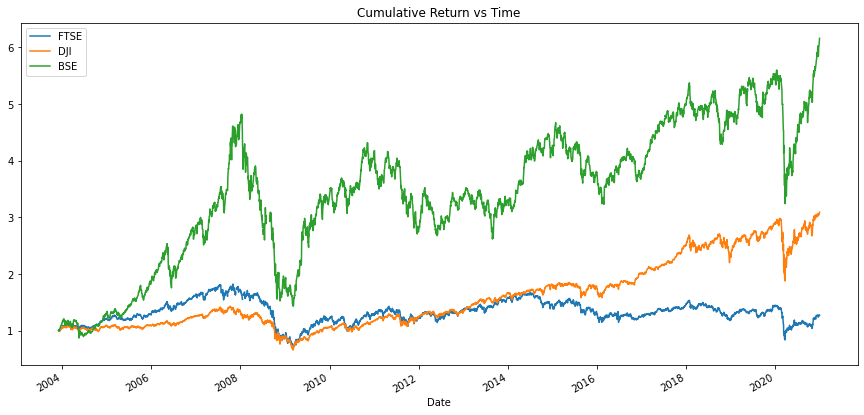

In [ ]:
#This graph of cumulative returns shows that BSE will give the most returns in the long run.
#We can also observe that all the three stocks' cumulative returns fall drastically during the Covid-19 period
#This also shows that FTSE if was used for long term investments would not give good returns.
FTSE['Cumulative Return'].plot(label = 'FTSE', figsize = (15,7))
DJI['Cumulative Return'].plot(label = 'DJI')
BSE['Cumulative Return'].plot(label = 'BSE')
plt.title('Cumulative Return vs Time')
plt.legend()
plt.show()